### Import libraries and data

In [ ]:
import csv #needed to import the CSV file
import math #needed for using the square root operation
from datetime import datetime #needed to measure the execution time

#get the training data from CSV file, assumed to have a header, and include label column at the end, ex:
#dataset = [[1,1,1],[2,2,1],[2,2,1],[6,6,2],[3,3,2],[7,7,2]]
with open('pima_diabetes.csv', newline='') as f:
    reader = csv.reader(f)
    dataset = list(reader)
    dataset = dataset[1:]


### Convert dataset elements type from String to Integer

In [2]:
for row in range(len(dataset)):
    for column in range(len(dataset[row])):
        if column==5 or column==6:
            dataset[row][column] = float(dataset[row][column])
        else:
            dataset[row][column] = int(dataset[row][column])

#for row in range(len(dataset)):
#for row in range(0,5):
    #print(dataset[row])

### Describe initial dataset

In [3]:
# convert data object to pandas, for better visualization
from pandas import DataFrame
df = DataFrame(dataset,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Plot the scatter matrix for the different features in the initial dataset

c:\users\u1\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\u1\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\u1\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.ro

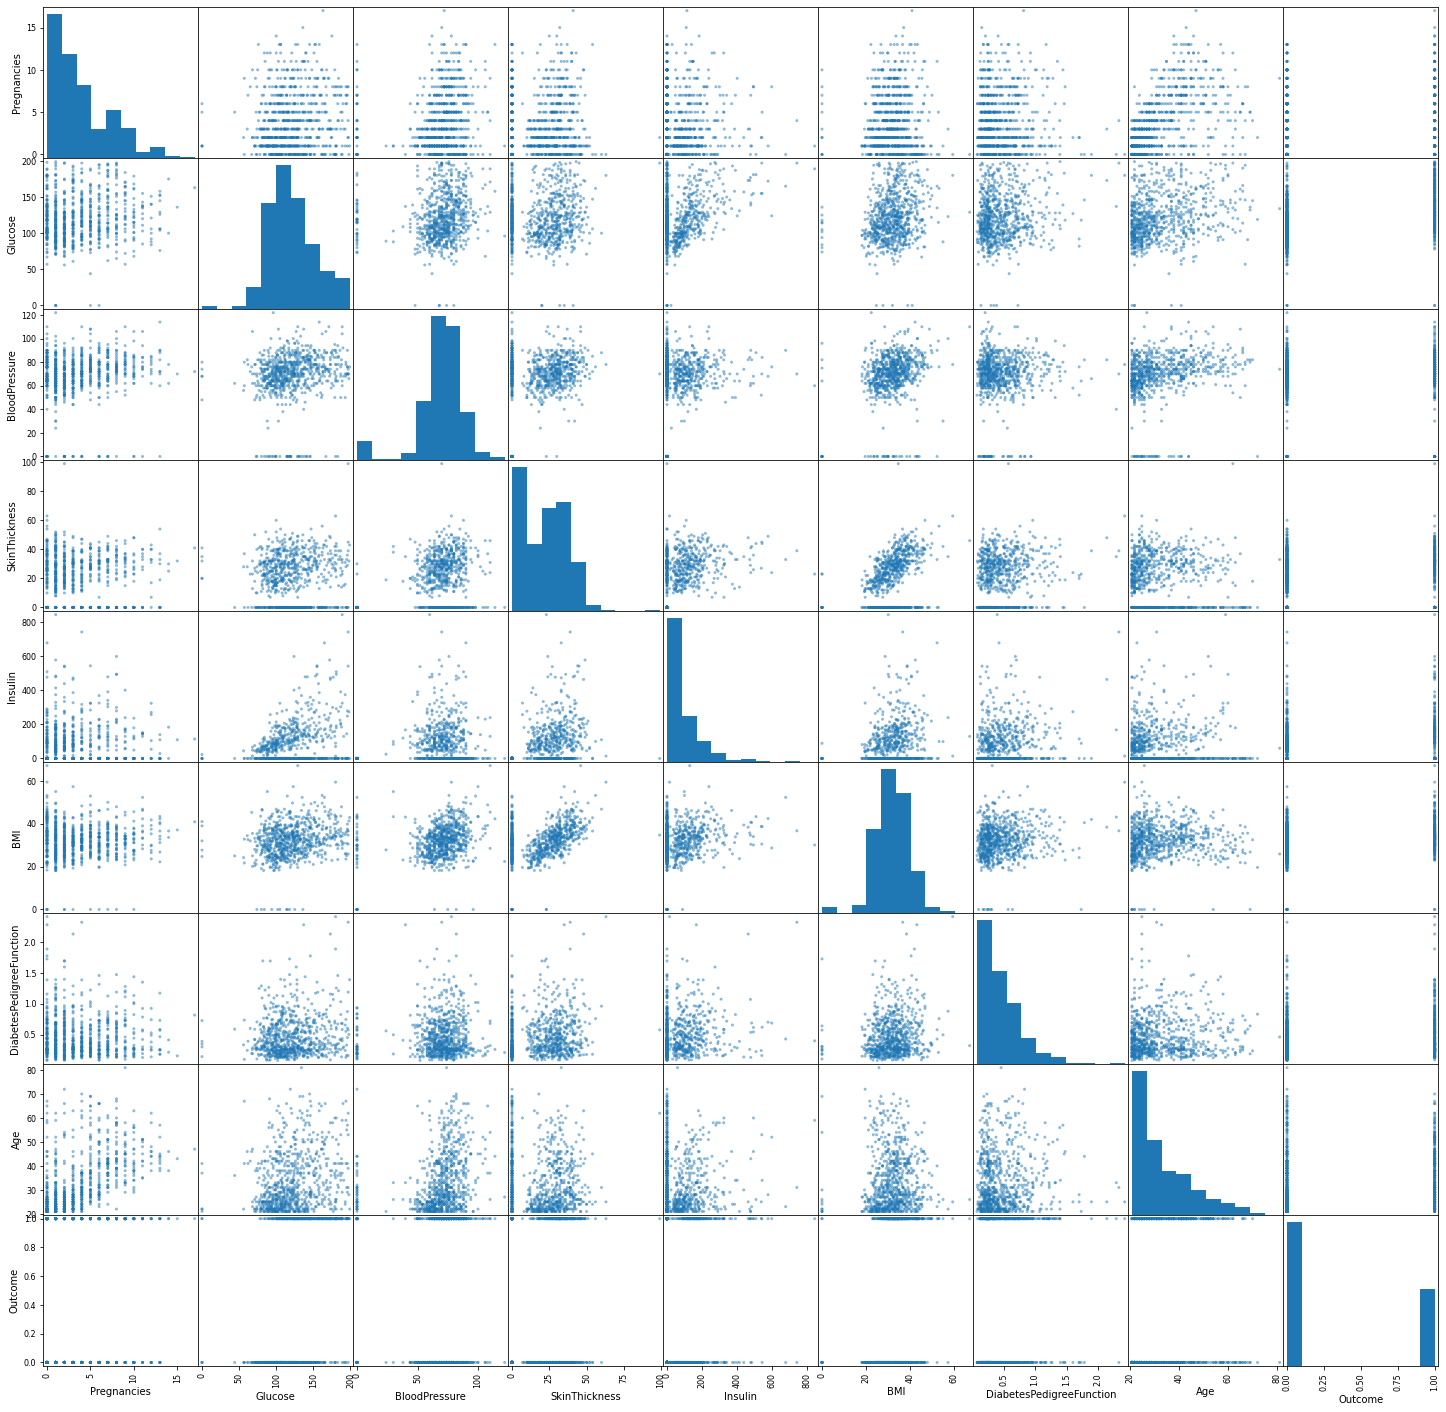

In [4]:
# Display the data in a scatter matrix
from pandas.plotting import scatter_matrix
p=scatter_matrix(df,figsize=(25, 25))

### Replace missing data with mean and rescale

In [5]:
# calculate mean, max, min for each column to be used later
meanval = list()
minval = list()
maxval = list()
for column in range(len(dataset[0])):
    values = [row[column] for row in dataset]
    meanval.append(round(sum(values)/len(dataset),3))
    minval.append(min(values))
    maxval.append(max(values))

# replace missing data with mean
for row in range(len(dataset)):
    for column in range(len(dataset[row])):
        if column==1 or column==2 or column==3 or column==4 or column==5 or column==6 or column==7:
            if dataset[row][column] == 0:
                dataset[row][column] = meanval[column]
        if column != 9:
            dataset[row][column] = round((dataset[row][column] - minval[column]) / (maxval[column] - minval[column]),3)
                
#for row in range(len(dataset)):
for row in range(0,5):
    print(dataset[row])

[0.353, 0.744, 0.59, 0.354, 0.094, 0.501, 0.234, 0.483, 1.0]
[0.059, 0.427, 0.541, 0.293, 0.094, 0.396, 0.117, 0.167, 0.0]
[0.471, 0.92, 0.525, 0.207, 0.094, 0.347, 0.254, 0.183, 1.0]
[0.059, 0.447, 0.541, 0.232, 0.111, 0.419, 0.038, 0.0, 0.0]
[0.0, 0.688, 0.328, 0.354, 0.199, 0.642, 0.944, 0.2, 1.0]


### Describe the normalized dataset

In [6]:
# convert data object to pandas, for better visualization
from pandas import DataFrame
df = DataFrame(dataset,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226198,0.611473,0.592273,0.268638,0.140089,0.483637,0.168176,0.204048,0.348958
std,0.198184,0.152964,0.099319,0.097362,0.110068,0.102448,0.141479,0.195984,0.476951
min,0.000000,0.221000,0.197000,0.071000,0.017000,0.271000,0.000000,0.000000,0.000000
25%,0.059000,0.501500,0.525000,0.207000,0.094000,0.410000,0.070750,0.050000,0.000000
50%,0.176000,0.588000,0.590000,0.232000,0.094000,0.477000,0.125500,0.133000,0.000000
75%,0.353000,0.705250,0.656000,0.323000,0.150250,0.545000,0.234000,0.333000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Plot the scatter matrix for the different features of the normalized dataset

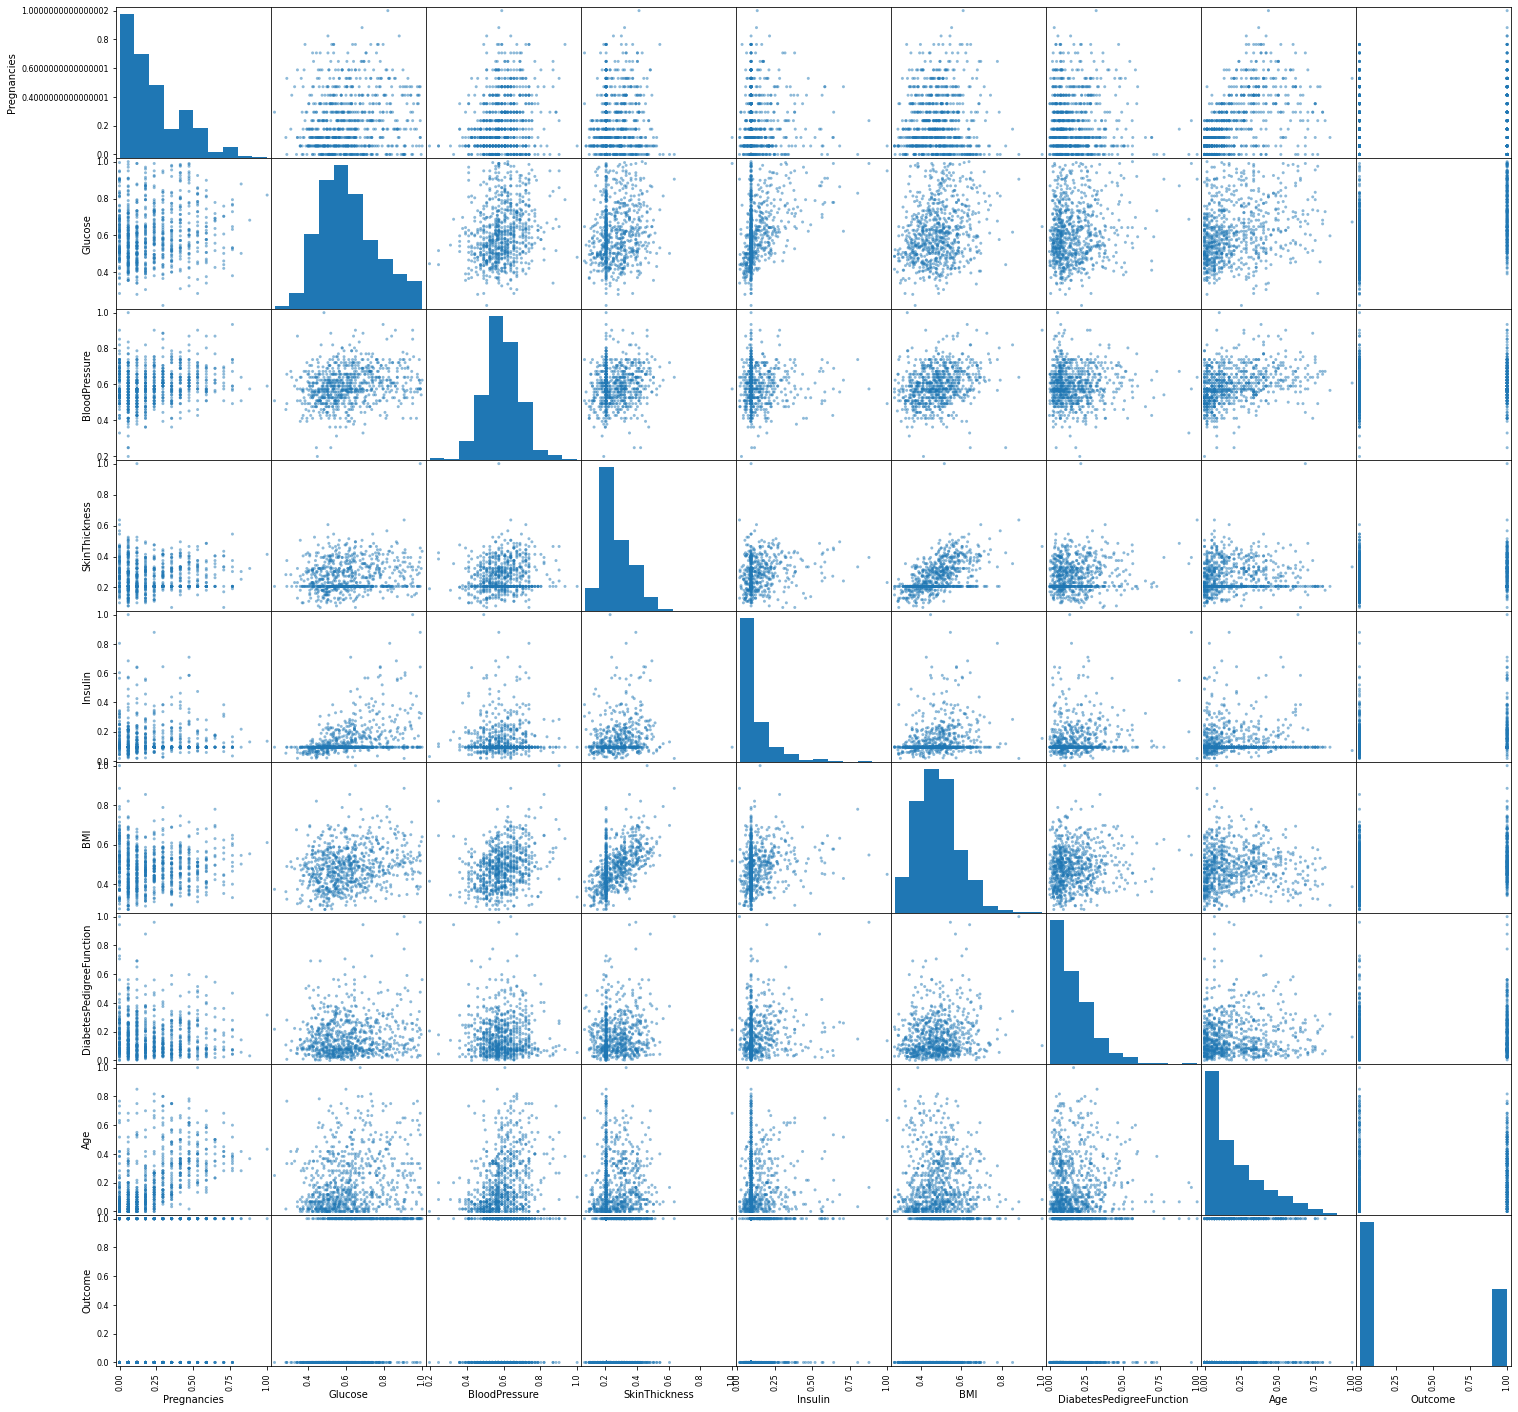

In [7]:
# Display the data in a scatter matrix
p=scatter_matrix(df,figsize=(25, 25))

### Make predictions

In [10]:
#define function to calculate the euclidean distance between 2 data points 
def get_eucldistance(point1, point2):
    coordinatedistance = totaldistance = 0.0
    for i in range(len(point1)-1):
        coordinatedistance = (point1[i] - point2[i])**2
        totaldistance = totaldistance + coordinatedistance
    return math.sqrt(totaldistance)

#define function to calculate the manhattan distance between 2 data points 
def get_manhattandistance(point1, point2):
    nbreoffeatures = len(point1)-1
    coordinatedistance = totaldistance = 0.0
    for i in range(nbreoffeatures):
        coordinatedistance = abs(point1[i] - point2[i])
        totaldistance = totaldistance + coordinatedistance
    return totaldistance

#define function to calculate the hamming distance between 2 data points 
def get_hammingdistance(point1, point2):
    nbreoffeatures = len(point1)-1
    totaldistance = 0
    for i in range(nbreoffeatures):
        if(point1[i] != point2[i]):
            totaldistance += 1
    return totaldistance

#define function to find k nearest neighbors for a datapoint in a dataset, k being a parameter 
def get_kneighbors(datapoint, dataset, kvalue, distancemetric):
    def myFunc(e):
        return e[1]
    templist = list()
    for row in dataset:
        if (distancemetric == "euclidean"):
            distance = get_eucldistance(datapoint, row)
        if (distancemetric == "manhattan"):
            distance = get_manhattandistance(datapoint, row)
        if (distancemetric == "hamming"):
            distance = get_hammingdistance(datapoint, row)
        templist.append((row,distance))
    templist.sort(key=myFunc)
    return(templist[:kvalue])

#define function to find the most common label in a list of datapoints
def get_commonlabel(kneighbors):
    klabels = list()
    for row in kneighbors:
        klabels.append(row[0][len(row[0])-1])
        #print(row[0][len(row)])
    return max(set(klabels), key=klabels.count)

def split_crossfoldvalidation(dataset, k_neighbors, k_fold, distancemetric):
    validationsetlength = int(len(dataset)/k_fold)
    results_metrics = list()
    for i in range(0, len(dataset)-1, validationsetlength):
        trainingdata = validationdata = list()
        if i + validationsetlength < len(dataset):
            validationdata_window_start = i
            validationdata_window_end = i + validationsetlength
            validationdata = dataset[validationdata_window_start:validationdata_window_end]
            trainingdata_partone = dataset[:validationdata_window_start]
            trainingdata_parttwo = dataset[validationdata_window_end:len(dataset)]
            trainingdata = trainingdata_partone + trainingdata_parttwo
        else:
            validationdata_window_start = i
            validationdata_window_end = len(dataset) % validationsetlength
            validationdata_partone = dataset[validationdata_window_start:]
            validationdata_parttwo = dataset[:validationdata_window_end]
            validationdata = validationdata_partone + validationdata_parttwo
            trainingdata = dataset[validationdata_window_end:validationdata_window_start]
        TP = TN = FP = FN = 0
        for row in validationdata:
            prediction = get_commonlabel(get_kneighbors(row, trainingdata, k_neighbors, distancemetric))
            actual = row[len(row)-1]
            if (actual == 1):
                if (prediction == actual):
                    TP += 1
                else:
                    FP += 1
            if (actual == 0):
                if (prediction == actual):
                    TN += 1
                else:
                    FN += 1
        results_metrics.append((TP, TN, FP, FN))
    total_TP = total_TN = total_FP = total_FN = 0
    for row in results_metrics:
        total_TP += row[0]
        total_TN += row[1]
        total_FP += row[2]
        total_FN += row[3]
    metrics = [total_TP, total_TN, total_FP, total_FN, len(results_metrics)*validationsetlength]
    return metrics

k_fold = 10

k_neighbors = 5
print(f"For k={k_neighbors}")

tableheader = ["Dist. Metric", "Duration(s)", "TP", "TN", "FP", "FN", "Accuracy", "Sensitivity", "Specificity"]
tabledata = list()
format_row = "{:>12}" * (len(tableheader))
print(format_row.format(*tableheader))

start = datetime.now()
metrics = split_crossfoldvalidation(dataset, k_neighbors, k_fold, "euclidean")
end = datetime.now()
tabledata.append(("Enclidean", str(round((end-start).total_seconds(), 2)), metrics[0], metrics[1], metrics[2], metrics[3], str(round((metrics[0]+metrics[1])/(metrics[0]+metrics[1]+metrics[2]+metrics[3]), 2)), str(round(metrics[0]/(metrics[0]+metrics[3]), 2)), str(round(metrics[1]/(metrics[1]+metrics[2]), 2))))

start = datetime.now()
metrics = split_crossfoldvalidation(dataset, k_neighbors, k_fold, "manhattan")
end = datetime.now()
tabledata.append(("Manhattan", str(round((end-start).total_seconds(), 2)), metrics[0], metrics[1], metrics[2], metrics[3], str(round((metrics[0]+metrics[1])/(metrics[0]+metrics[1]+metrics[2]+metrics[3]), 2)), str(round(metrics[0]/(metrics[0]+metrics[3]), 2)), str(round(metrics[1]/(metrics[1]+metrics[2]), 2))))

start = datetime.now()
metrics = split_crossfoldvalidation(dataset, k_neighbors, k_fold, "hamming")
end = datetime.now()
tabledata.append(("Hamming", str(round((end-start).total_seconds(), 2)), metrics[0], metrics[1], metrics[2], metrics[3], str(round((metrics[0]+metrics[1])/(metrics[0]+metrics[1]+metrics[2]+metrics[3]), 2)), str(round(metrics[0]/(metrics[0]+metrics[3]), 2)), str(round(metrics[1]/(metrics[1]+metrics[2]), 2))))

for row in tabledata:
    print(format_row.format(*row))

k_neighbors = 10
print(f"For k={k_neighbors}")

tableheader = ["Dist. Metric", "Duration(s)", "TP", "TN", "FP", "FN", "Accuracy", "Sensitivity", "Specificity"]
tabledata = list()
format_row = "{:>12}" * (len(tableheader))
print(format_row.format(*tableheader))

start = datetime.now()
metrics = split_crossfoldvalidation(dataset, k_neighbors, k_fold, "euclidean")
end = datetime.now()
tabledata.append(("Enclidean", str(round((end-start).total_seconds(), 2)), metrics[0], metrics[1], metrics[2], metrics[3], str(round((metrics[0]+metrics[1])/(metrics[0]+metrics[1]+metrics[2]+metrics[3]), 2)), str(round(metrics[0]/(metrics[0]+metrics[3]), 2)), str(round(metrics[1]/(metrics[1]+metrics[2]), 2))))

start = datetime.now()
metrics = split_crossfoldvalidation(dataset, k_neighbors, k_fold, "manhattan")
end = datetime.now()
tabledata.append(("Manhattan", str(round((end-start).total_seconds(), 2)), metrics[0], metrics[1], metrics[2], metrics[3], str(round((metrics[0]+metrics[1])/(metrics[0]+metrics[1]+metrics[2]+metrics[3]), 2)), str(round(metrics[0]/(metrics[0]+metrics[3]), 2)), str(round(metrics[1]/(metrics[1]+metrics[2]), 2))))

start = datetime.now()
metrics = split_crossfoldvalidation(dataset, k_neighbors, k_fold, "hamming")
end = datetime.now()
tabledata.append(("Hamming", str(round((end-start).total_seconds(), 2)), metrics[0], metrics[1], metrics[2], metrics[3], str(round((metrics[0]+metrics[1])/(metrics[0]+metrics[1]+metrics[2]+metrics[3]), 2)), str(round(metrics[0]/(metrics[0]+metrics[3]), 2)), str(round(metrics[1]/(metrics[1]+metrics[2]), 2))))

for row in tabledata:
    print(format_row.format(*row))
    
k_neighbors = 20
print(f"For k={k_neighbors}")

tableheader = ["Dist. Metric", "Duration(s)", "TP", "TN", "FP", "FN", "Accuracy", "Sensitivity", "Specificity"]
tabledata = list()
format_row = "{:>12}" * (len(tableheader))
print(format_row.format(*tableheader))

start = datetime.now()
metrics = split_crossfoldvalidation(dataset, k_neighbors, k_fold, "euclidean")
end = datetime.now()
tabledata.append(("Enclidean", str(round((end-start).total_seconds(), 2)), metrics[0], metrics[1], metrics[2], metrics[3], str(round((metrics[0]+metrics[1])/(metrics[0]+metrics[1]+metrics[2]+metrics[3]), 2)), str(round(metrics[0]/(metrics[0]+metrics[3]), 2)), str(round(metrics[1]/(metrics[1]+metrics[2]), 2))))

start = datetime.now()
metrics = split_crossfoldvalidation(dataset, k_neighbors, k_fold, "manhattan")
end = datetime.now()
tabledata.append(("Manhattan", str(round((end-start).total_seconds(), 2)), metrics[0], metrics[1], metrics[2], metrics[3], str(round((metrics[0]+metrics[1])/(metrics[0]+metrics[1]+metrics[2]+metrics[3]), 2)), str(round(metrics[0]/(metrics[0]+metrics[3]), 2)), str(round(metrics[1]/(metrics[1]+metrics[2]), 2))))

start = datetime.now()
metrics = split_crossfoldvalidation(dataset, k_neighbors, k_fold, "hamming")
end = datetime.now()
tabledata.append(("Hamming", str(round((end-start).total_seconds(), 2)), metrics[0], metrics[1], metrics[2], metrics[3], str(round((metrics[0]+metrics[1])/(metrics[0]+metrics[1]+metrics[2]+metrics[3]), 2)), str(round(metrics[0]/(metrics[0]+metrics[3]), 2)), str(round(metrics[1]/(metrics[1]+metrics[2]), 2))))

for row in tabledata:
    print(format_row.format(*row))

For k=5
Dist. Metric Duration(s)          TP          TN          FP          FN    Accuracy Sensitivity Specificity
   Enclidean         2.2         157         419         115          85        0.74        0.65        0.78
   Manhattan         1.3         159         417         113          87        0.74        0.65        0.79
     Hamming        1.07         106         402         166         102        0.65        0.51        0.71
For k=10
Dist. Metric Duration(s)          TP          TN          FP          FN    Accuracy Sensitivity Specificity
   Enclidean        2.05         141         446         131          58        0.76        0.71        0.77
   Manhattan         1.3         129         449         143          55        0.74         0.7        0.76
     Hamming        1.09          65         448         207          56        0.66        0.54        0.68
For k=20
Dist. Metric Duration(s)          TP          TN          FP          FN    Accuracy Sensitivity Speci